# Exploratory Data Analysis (EDA)

In this notebook, we’ll explore the cleaned datasets to uncover patterns and relationships relevant to fraud detection. This step helps us understand the data’s structure, detect outliers, and gain insights that guide feature engineering and model design.

We’ll cover:

1. Univariate analysis (distributions, class imbalance)
2. Bivariate analysis (correlation with target)
3. Fraud vs. non-fraud comparisons
4. Summary of key findings


#Import Libraries and Load Cleaned Data


In [14]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Load cleaned datasets
fraud_df = pd.read_csv(r"C:\Users\Antifragile\Desktop\Fraud_detection\data\clean\final_fraud_data.csv")
creditcard_df = pd.read_csv(r"C:\Users\Antifragile\Desktop\Fraud_detection\data\clean\final_creditcard.csv")

print("data loaded")


data loaded


In [15]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# Check value counts in each dataset
print(" final Fraud Data:")
print(fraud_df["class"].value_counts(), "\n")

print("Credit Card Fraud Data:")
print(creditcard_df["Class"].value_counts())

 final Fraud Data:
0    136961
1     14151
Name: class, dtype: int64 

Credit Card Fraud Data:
0    283253
1       473
Name: Class, dtype: int64


In [12]:
print("final creditcard data:")
print(creditcard_df.shape)

final creditcard data:
(283726, 31)


In [11]:
print("final Fraud data:")
print(fraud_df.shape)


final Fraud data:
(151112, 11)


#UNIVARIATE ANALYSIS - FRAUD DATA

We’ll analyze:
- Distribution of the target variable (fraud vs. non-fraud)
- Categorical features (browser, source, sex)
- Numerical features (age, purchase_value, amount)


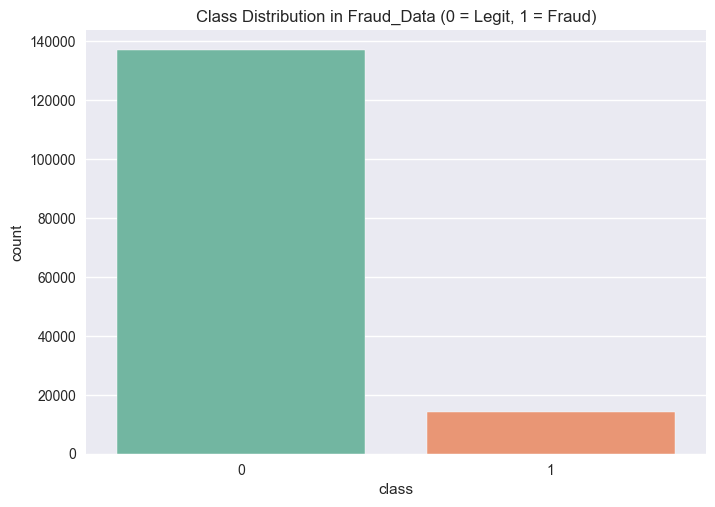

0    90.635423
1     9.364577
Name: class, dtype: float64


In [19]:
# Check class distribution
sns.countplot(data=fraud_df, x="class", palette="Set2")
plt.title("Class Distribution in Fraud_Data (0 = Legit, 1 = Fraud)")
plt.show()

# Display counts
print(fraud_df['class'].value_counts(normalize=True) * 100)


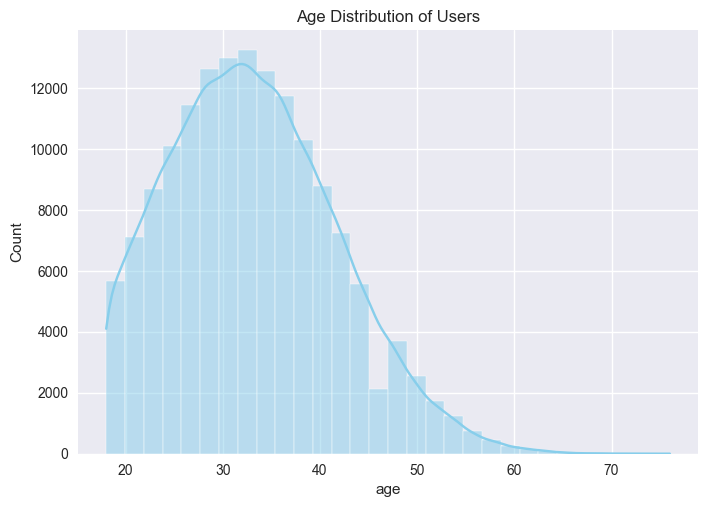

In [20]:
# Age distribution
sns.histplot(fraud_df['age'], kde=True, bins=30, color="skyblue")
plt.title("Age Distribution of Users")
plt.show()


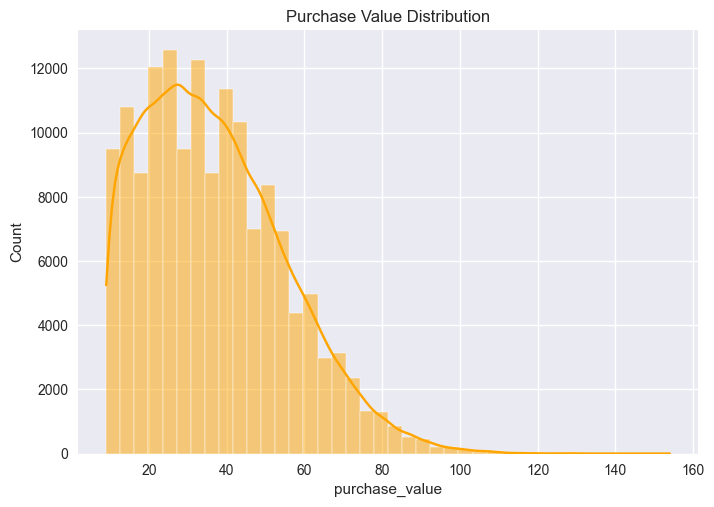

In [21]:
# Purchase value distribution
sns.histplot(fraud_df['purchase_value'], kde=True, bins=40, color="orange")
plt.title("Purchase Value Distribution")
plt.show()


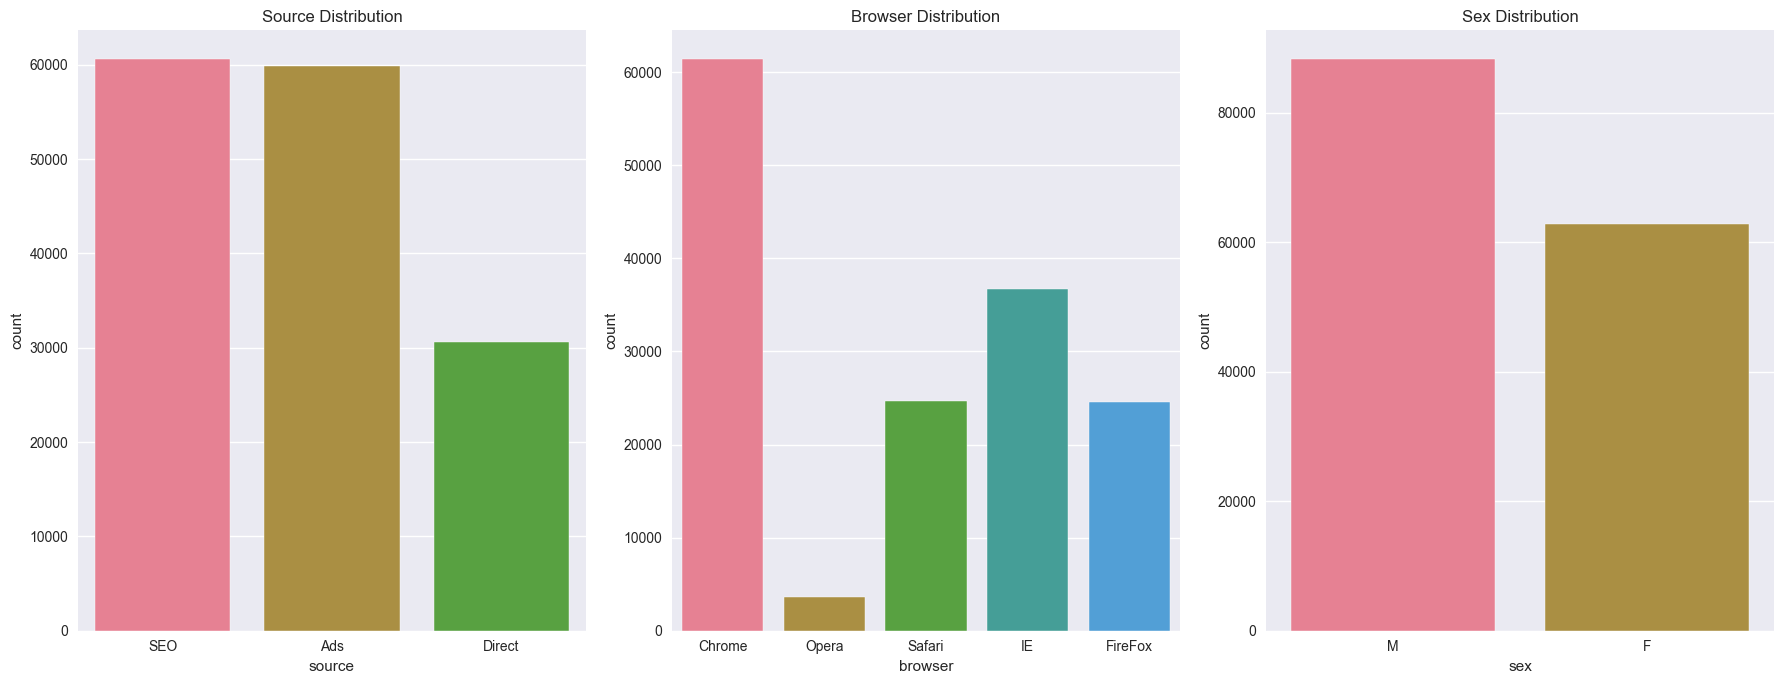

In [23]:
# Categorical counts
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

sns.countplot(data=fraud_df, x='source', ax=axs[0])
axs[0].set_title("Source Distribution")

sns.countplot(data=fraud_df, x='browser', ax=axs[1])
axs[1].set_title("Browser Distribution")

sns.countplot(data=fraud_df, x='sex', ax=axs[2])
axs[2].set_title("Sex Distribution")

plt.tight_layout()
plt.show()


 #BIVARIATE ANALYSIS - FRAUD DATA

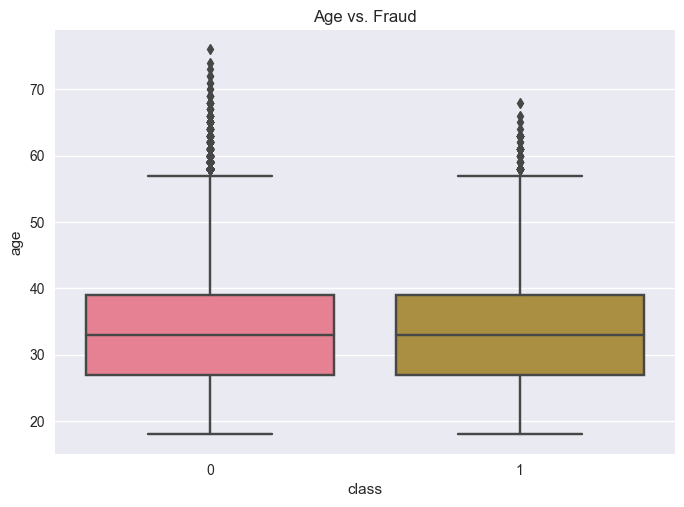

In [24]:
# Age vs Fraud
sns.boxplot(data=fraud_df, x="class", y="age")
plt.title("Age vs. Fraud")
plt.show()


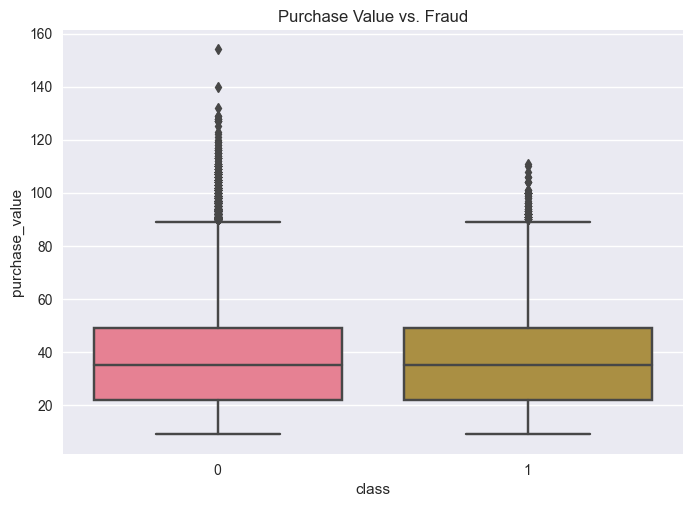

In [25]:
# Purchase Value vs Fraud
sns.boxplot(data=fraud_df, x="class", y="purchase_value")
plt.title("Purchase Value vs. Fraud")
plt.show()


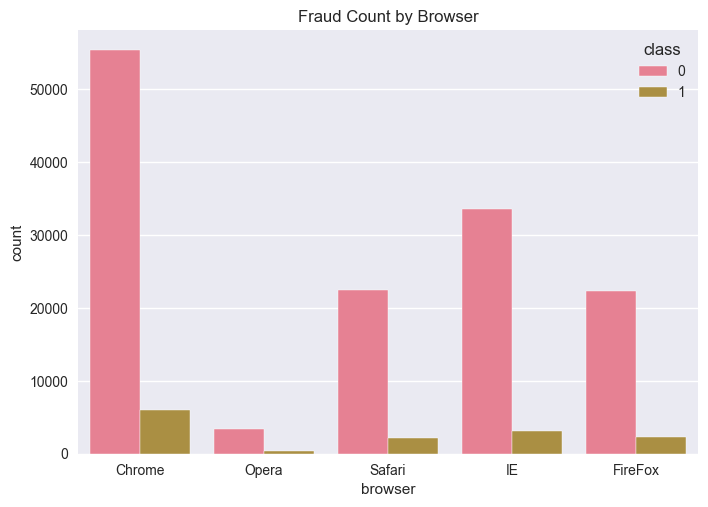

In [26]:
# Browser vs Fraud
sns.countplot(data=fraud_df, x='browser', hue='class')
plt.title("Fraud Count by Browser")
plt.show()


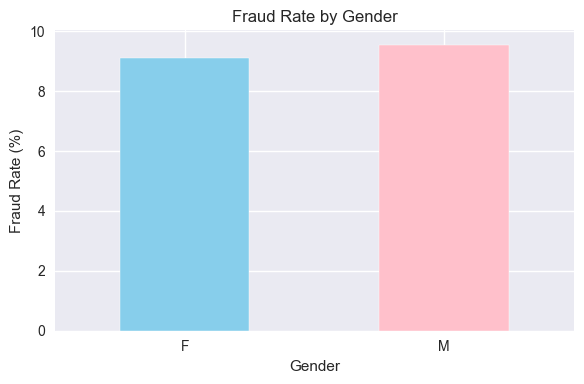

In [28]:

# Group by gender and calculate fraud rate
gender_fraud = fraud_df.groupby('sex')['class'].agg(['count', 'sum', 'mean'])
gender_fraud['fraud_rate'] = gender_fraud['mean'] * 100

# Plot
plt.figure(figsize=(6, 4))
gender_fraud['fraud_rate'].plot(kind='bar', color=['skyblue', 'pink'])

# Customize plot
plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


#CREDIT CARD DATASET EDA

UNIVARIATE ANALYSIS - CREDIT CARD DATA

In [30]:
print("Dataset Overview:")
print(f"Shape: {creditcard_df.shape}")
print(f"Fraud rate: {creditcard_df['Class'].mean()*100:.4f}%")


Dataset Overview:
Shape: (283726, 31)
Fraud rate: 0.1667%


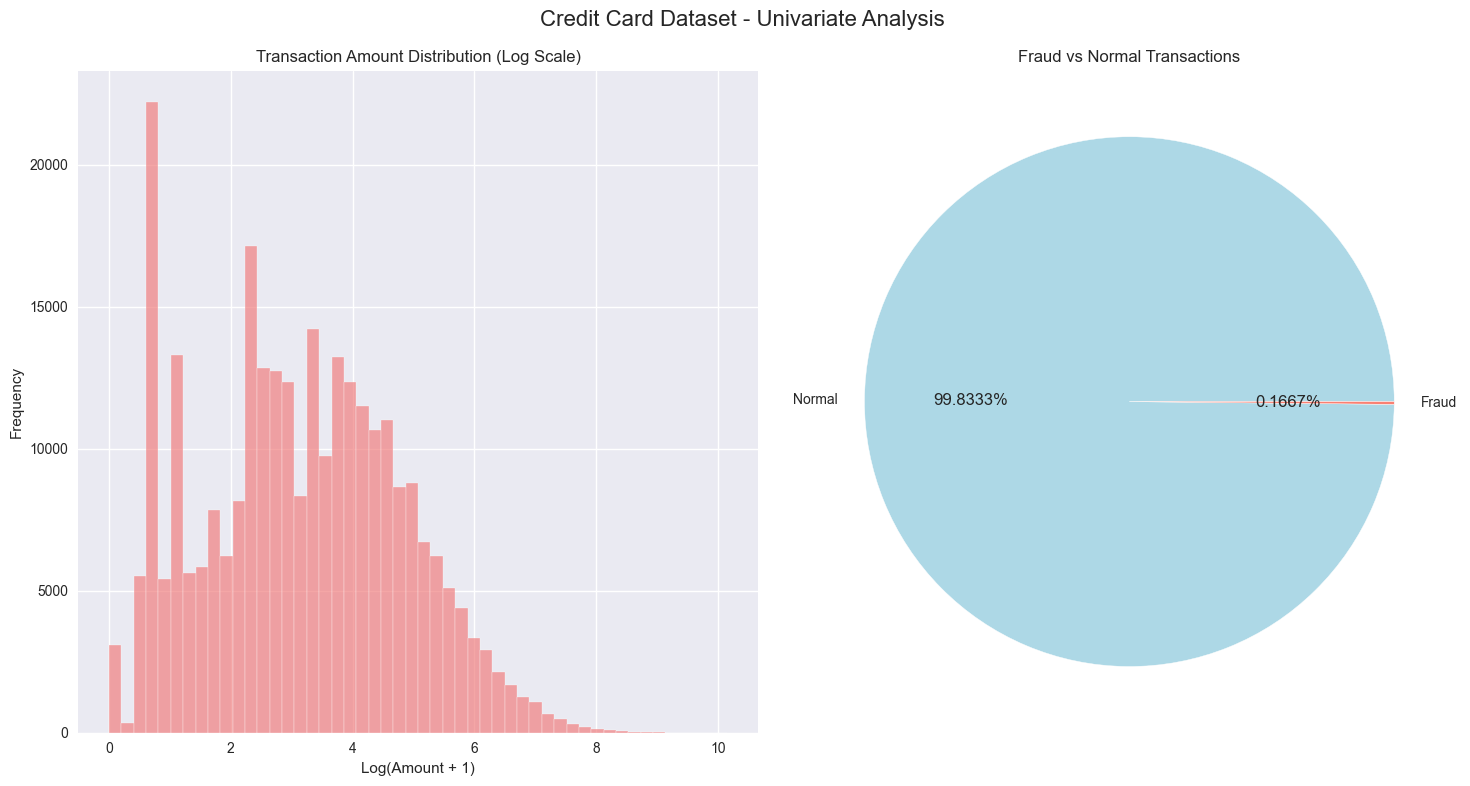

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Credit Card Dataset - Univariate Analysis', fontsize=16)

# Transaction Amount distribution (log scale)
axes[0].hist(np.log1p(creditcard_df['Amount']), bins=50, alpha=0.7, color='lightcoral')
axes[0].set_title('Transaction Amount Distribution (Log Scale)')
axes[0].set_xlabel('Log(Amount + 1)')
axes[0].set_ylabel('Frequency')


# Class distribution
class_counts = creditcard_df['Class'].value_counts()
axes[1].pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.4f%%', colors=['lightblue', 'salmon'])
axes[1].set_title('Fraud vs Normal Transactions')

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS - CREDIT CARD DATA


Bivariate Analysis - Credit Card Dataset:


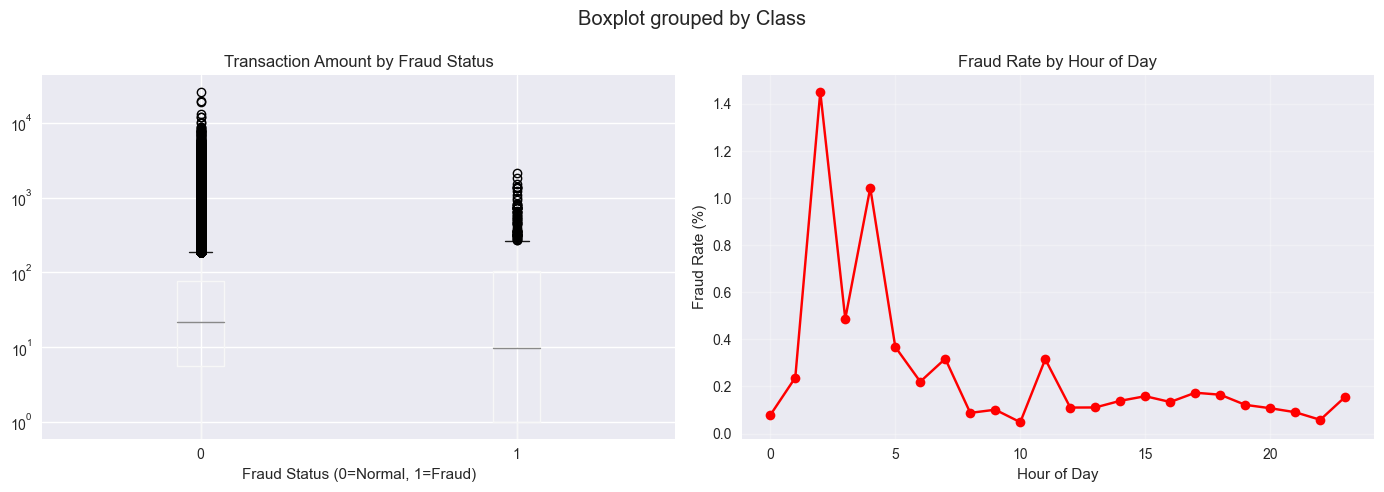

In [ ]:
print("\nBivariate Analysis - Credit Card Dataset:")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Credit Card Dataset - Bivariate Analysis', fontsize=16)

# Amount vs Fraud
creditcard_df.boxplot(column='Amount', by='Class', ax=axes[0])
axes[0].set_title('Credit Card Fraud Data visualizations ')
axes[0].set_xlabel('Fraud Status (0=Normal, 1=Fraud)')
axes[0].set_yscale('log')

# Time vs Fraud (hourly pattern)
creditcard_df['hour'] = (creditcard_df['Time'] // 3600) % 24
hourly_fraud = creditcard_df.groupby('hour')['Class'].agg(['count', 'sum', 'mean'])
hourly_fraud['fraud_rate'] = hourly_fraud['mean'] * 100

axes[1].plot(hourly_fraud.index, hourly_fraud['fraud_rate'], marker='o', color='red')
axes[1].set_title('Fraud Rate by Hour of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

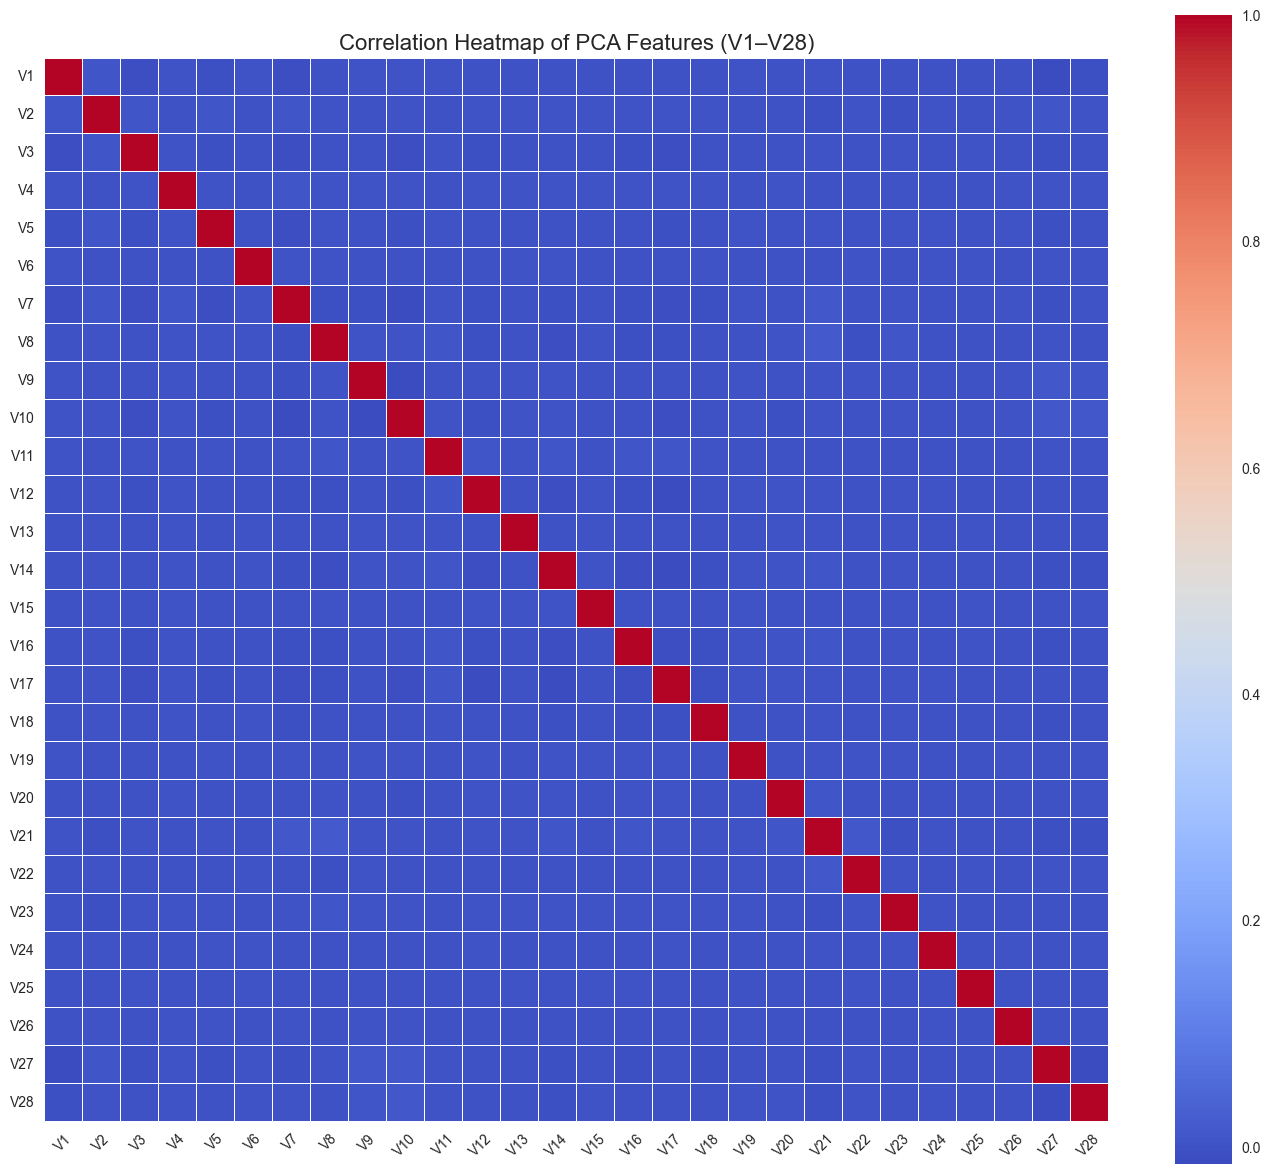

In [48]:

# Select only PCA columns V1 to V28
pca_features = [col for col in creditcard_df.columns if col.startswith('V')]
pca_data = creditcard_df[pca_features]

# Compute the correlation matrix
corr_matrix = pca_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", square=True, linewidths=.5)

# Titles and labels
plt.title("Correlation Heatmap of PCA Features (V1–V28)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

                  V1             V2             V3             V4  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.005917      -0.004135       0.001613      -0.002966   
std         1.948026       1.646703       1.508682       1.414184   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.915951      -0.600321      -0.889682      -0.850134   
50%         0.020384       0.063949       0.179963      -0.022248   
75%         1.316068       0.800283       1.026960       0.739647   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001828      -0.001139       0.001801      -0.000854   
std         1.377008       1.331931       1.227664       1.179054   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.689830      -0.7690

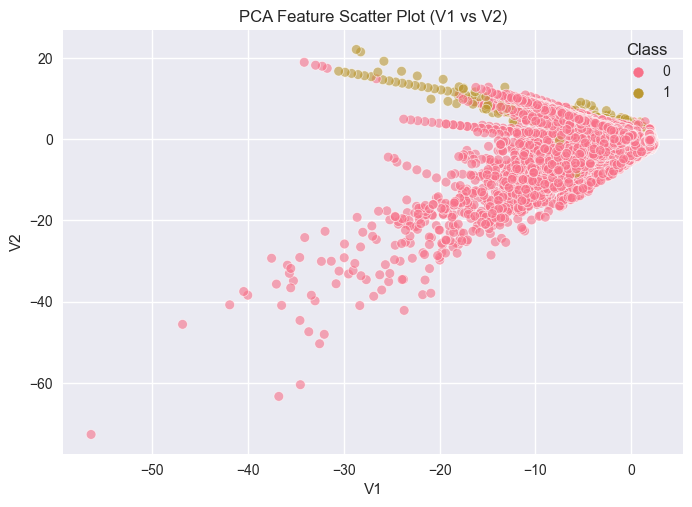

In [45]:
# PCA Analysis
# Summary of the PCA features
print(creditcard_df.iloc[:, 1:29].describe())  # V1 to V28

# Compare V1 vs V2 colored by fraud
sns.scatterplot(data=creditcard_df, x='V1', y='V2', hue='Class', alpha=0.6)
plt.title('PCA Feature Scatter Plot (V1 vs V2)')
plt.show()

In [42]:
print("\n" + "="*60)
print("SUMMARY INSIGHTS")
print("="*60)

print("FRAUD DATASET:")
print(f"• Total transactions: {len(fraud_df):,}")
print(f"• Fraud transactions: {fraud_df['class'].sum():,}")
print(f"• Fraud rate: {fraud_df['class'].mean()*100:.2f}%")
print(f"• Average age: {fraud_df['age'].mean():.1f} years")
print(f"• Average purchase value: ${fraud_df['purchase_value'].mean():.2f}")

print(f"\nCREDIT CARD DATASET:")
print(f"• Total transactions: {len(creditcard_df):,}")
print(f"• Fraud transactions: {creditcard_df['Class'].sum():,}")
print(f"• Fraud rate: {creditcard_df['Class'].mean()*100:.4f}%")
print(f"• Average transaction amount: ${creditcard_df['Amount'].mean():.2f}")

print("\nKEY FINDINGS:")
print("• Both datasets are highly imbalanced")
print("• Fraud transactions tend to have different patterns")
print("• Time-based features may be important")
print("• Need to handle class imbalance carefully")


SUMMARY INSIGHTS
FRAUD DATASET:
• Total transactions: 151,112
• Fraud transactions: 14,151
• Fraud rate: 9.36%
• Average age: 33.1 years
• Average purchase value: $36.94

CREDIT CARD DATASET:
• Total transactions: 283,726
• Fraud transactions: 473
• Fraud rate: 0.1667%
• Average transaction amount: $88.47

KEY FINDINGS:
• Both datasets are highly imbalanced
• Fraud transactions tend to have different patterns
• Time-based features may be important
• Need to handle class imbalance carefully
